# Notebook 1 - Working with Vector Data in GemGIS

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functioans to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present how vector data can be loaded into GemGIS with the [GeoPandas](https://geopandas.org/) package and how it can be manipulated for the usage in [GemPy](https://github.com/cgre-aachen/gempy). This includes the extraction of coordinates and height values from a GeoDataFrame and DEM, respectively. Like GemPy is focusing on a `geo_model` object, GemGIS is focusing on a `geo_data` object, that is recommended to be used. 

- [What is Vector Data?](#vector)
- [What is GeoPandas?](#gpd)
- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)
- [Creating a GemPy Model with GemPy Data Class](#ex4)
- [Example 1.1 - Point Data - Interface](#ex1.1)
- [Example 1.2 - Point Data - Orientations](#ex1.2)
- [Example 2.1 - Line Data - Lithological Boundaries](#ex2.1)
- [Example 2.2 - Line Data - Contour Lines](#ex2.2)
- [Example 3.1 - Clip Vector Data by Extent - Points](#ex3.1)
- [Example 3.2 - Clip Vector Data by Extent - Lines](#ex3.2)
- [Example 3.3 - Clip Vector Data by Shape - Points](#ex3.3)
- [Example 3.4 - Clip Vector Data by Shape - Lines](#ex3.4)
- [Postprocessing - Converting Geological Map to Shape Files and GeoTIFF](#post)

<a id='vector'></a>
## What is vector data?

Vector data provides a way to represent real world features within a GIS environment. A feature is anything you can see on the landscape. Imagine you are standing on the top of a hill. Looking down, you can see houses, roads, trees, rivers, and so on. Each one of these things would be a feature when we represent them in a GIS application. Vector features have attributes, which consist of text or numerical information that describe the features.

**Point Data**<br>
A point feature has an X, Y and optionally, Z value. The X and Y values will depend on the Coordinate Reference System (CRS) being used. For now, let us simply say, that a CRS is a way to accurately describe where a particular place is on the earth's surface. One of the most common reference systems is Longitude and Latitude. Lines of Longitude run from the North Pole to the South Pole. Lines of Latitude run from the East to West. You can describe precisely where you are at any place on the earth by giving someone your Longitude (X) and Latitude (Y). Since we know the earth is not flat, it is often useful to add a Z value to a point feature. This describes how high above sea level you are.


**Polyline Data**<br>
A polyline is used to show the geometry of linear features such as roads, rivers, contours, footpaths, flight paths and so on. Sometimes, we have special rules for polylines in addition to their basic geometry. For example, contour lines may touch (e.g. at a cliff face) but should never cross over each other. Similarly, polylines used to store a road network should be connected at intersections. In some GIS applications, you can set these special rules for a feature type (e.g. roads) and the GIS will ensure that these polylines always comply to these rules.


**Polygons**<br>
Polygon features are enclosed areas like dams, islands, country boundaries and so on. Like polyline features, polygons are created from a series of vertices that are connected with a continuous line. However, because a polygon always describes an enclosed area, the first and last vertices should always be at the same place! Polygons often have shared geometry boundaries that are in common with a neighbouring polygon. Many GIS applications have the capability to ensure that the boundaries of neighbouring polygons exactly coincide. 

<img src="../data/Images/vector.png" width="300">

Sources: https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/vector_data.html, https://www.vebuso.com/2019/01/vector-raster-tale-two-spatial-data-types/

<a id='gpd'></a>
## What is GeoPandas?

[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by [Pandas](https://pandas.pydata.org/) to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/latest/manual.html). Geopandas further depends on [fiona](https://fiona.readthedocs.io/en/latest/manual.html) for file access and [descartes](https://pypi.org/project/descartes/) and [matplotlib](https://matplotlib.org/) for plotting

For more information see: https://geopandas.org/index.html

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy` is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware. that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and `polarity` values are needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image source: Geological Structures: a Practical Introduction - John W.F. Waldron and Morgan Snyder

<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load online services as vector and raster data
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data
* `misc.py` - file containing functions for custom tasks 


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class later in the tutorial, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\alexa\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Sat Aug 29 21:04:32 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 8
           Machine : AMD64
      Architecture : 64bit
               RAM : 7.9 GB
       Environment : Jupyter

  Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.19.2
            pandas : 1.0.5
           shapely : 1.7.0
           pyvista : 0.25.3
          rasterio : 1.1.0
         geopandas : 0.6.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.16.2
        matplotlib : 3.3.1

  Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

<a id='ex4'></a>
# Creating a simple GemPy Model - GemPy Data Class

As GemGIS is providing functions to more easily create GemPy Models, a **GemPy Data Class** is being introduced. This class consists of attributes, such as the CRS of all input data, the interfaces, orientations, custom_sections, etc. It can be initiated empty or attributes can be passed during the initiation. During the course of the following notebooks, more and more attributes will be introduced. For more information about GemPy, visit https://docs.gempy.org/ or https://github.com/cgre-aachen/gempy.

## Initiating the class without attributes
Intiating the GemPy Data Class without attributes will set all of them to `None`.

In [3]:
geo_data = gg.GemPyData()

The following attributes are currently available:

In [4]:
vars(geo_data)

{'model_name': None,
 'crs': None,
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None}

## Initiating the class with attributes
The data class can also be initiated with attributes. 

In [5]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326', 
                        extent=[0., 972., 0., 1069., 300., 800.], 
                        resolution=[50,50,50],
                        stack={"Strat_Series": ('Sand', 'Ton')},
                        dem='../../gemgis/data/Test1/raster1.tif',
                        surface_colors= {'Ton':'#015482',
                                         'Sand':'#9f0052',
                                         'basement':'#ffbe00'})

In [6]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [0.0, 972.0, 0.0, 1069.0, 300.0, 800.0],
 'resolution': [50, 50, 50],
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': {'Strat_Series': ('Sand', 'Ton')},
 'dem': '../../gemgis/data/Test1/raster1.tif',
 'surface_colors': {'Ton': '#015482',
  'Sand': '#9f0052',
  'basement': '#ffbe00'},
 'geolmap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'model_width': 972.0,
 'model_height': 1069.0,
 'model_depth': 500.0,
 'model_area': 1039068.0,
 'model_volume': 519534000.0,
 'cell_width': 19.44,
 'cell_height': 21.38,
 'cell_depth': 10.0}

## Inspecting the attributes GemPy Data Class
These attributes can now be inspected. 

In [7]:
geo_data.model_name

'Model1'

In [8]:
geo_data.crs

'EPSG:4326'

In [9]:
geo_data.extent

[0.0, 972.0, 0.0, 1069.0, 300.0, 800.0]

In [10]:
geo_data.resolution

[50, 50, 50]

In [11]:
geo_data.stack

{'Strat_Series': ('Sand', 'Ton')}

In [12]:
geo_data.dem

'../../gemgis/data/Test1/raster1.tif'

In [13]:
geo_data.surface_colors

{'Ton': '#015482', 'Sand': '#9f0052', 'basement': '#ffbe00'}

<a id='ex1.1'></a>
# Example 1.1 - Point Data - Interfaces

As a first example, we will have a look at a geological map as shown below. The gray southward dipping layer is surrounded by two white layers. The topography decreases from north to south. A shape file ```interfaces1.shp``` contains points digitized along the layer boundaries. The respective formation for the base of each layer is provided. This data can now be loaded and plotted as shown below. The strength of GemGIS is that it is working with pure GeoDataFrames providing you with their full range of functionality. However, in order to visualize the input data with the `GemGIS` plotting function, certain attributes need to be used. This will be explained at the respective places later on.

**What is a GeoDataFrame?**<br>
A GeoDataFrame object is a pandas.DataFrame that has a column with geometry. 

For more information see: https://geopandas.org/reference/geopandas.GeoDataFrame.html

**What is a coordinate reference system?**<br>
The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

For more information see: https://geopandas.org/projections.html and https://spatialreference.org/ for codes for most commonly used projections.

For the tutorials `EPSG:4326` (WGS84 latitude-longitude projection) is used. It ranges from -180 to 180 degrees (longitude) and -90 to 90 degrees (latitude). For simplicity it is assumed that the units are meters and not degrees. This implies, that the extent of the examples does not relate to the real world but a CRS is needed for transformation purposes. 

***For this example we will use the following functions:***

- ```geo_data.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">



## Loading data

The interface data will be loaded as a GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the [repository](https://github.com/cgre-aachen/gemgis). Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [14]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `interfaces` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [15]:
geo_data.raw_i = interfaces
geo_data.raw_i.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [16]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object.

In [17]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame defines one object. In this case, each row defines one point with an X and Y coordinate. 

In [18]:
geo_data.raw_i.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


### Inspecting Data Types

In [19]:
geo_data.raw_i.dtypes

id             object
formation      object
geometry     geometry
dtype: object

### Information of the GeoDataFrame

In [20]:
geo_data.raw_i.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         0 non-null      object  
 1   formation  41 non-null     object  
 2   geometry   41 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.1+ KB


### Inspecting the CRS

In [21]:
geo_data.raw_i.crs

{'init': 'epsg:4326'}

### Inspecting the Geometry Type

In [22]:
geo_data.raw_i.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

### Inspecting the total bounds of the GeoDataFrame

In [23]:
geo_data.raw_i.total_bounds

array([   8.84067296,  164.9607695 ,  966.07357798, 1045.38823411])

### Inspecting the area of the data

In [24]:
geo_data.raw_i.area.head()

0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
dtype: float64

### Inspecting the bounds of the data set

In [25]:
geo_data.raw_i.bounds.head()

,minx,miny,maxx,maxy
0,19.15,293.31,19.15,293.31
1,61.93,381.46,61.93,381.46
2,109.36,480.95,109.36,480.95
3,157.81,616.00,157.81,616.00
4,191.32,719.09,191.32,719.09


### Inspecting the X values of the geometry column

In [26]:
geo_data.raw_i.geometry.x.head()

0    19.15
1    61.93
2   109.36
3   157.81
4   191.32
dtype: float64

### Inspecting the Y values of the geometry column

In [27]:
geo_data.raw_i.geometry.y.head()

0   293.31
1   381.46
2   480.95
3   616.00
4   719.09
dtype: float64

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas. These were combined in a designated plotting function `gg.visualization.plot_data(...)`.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

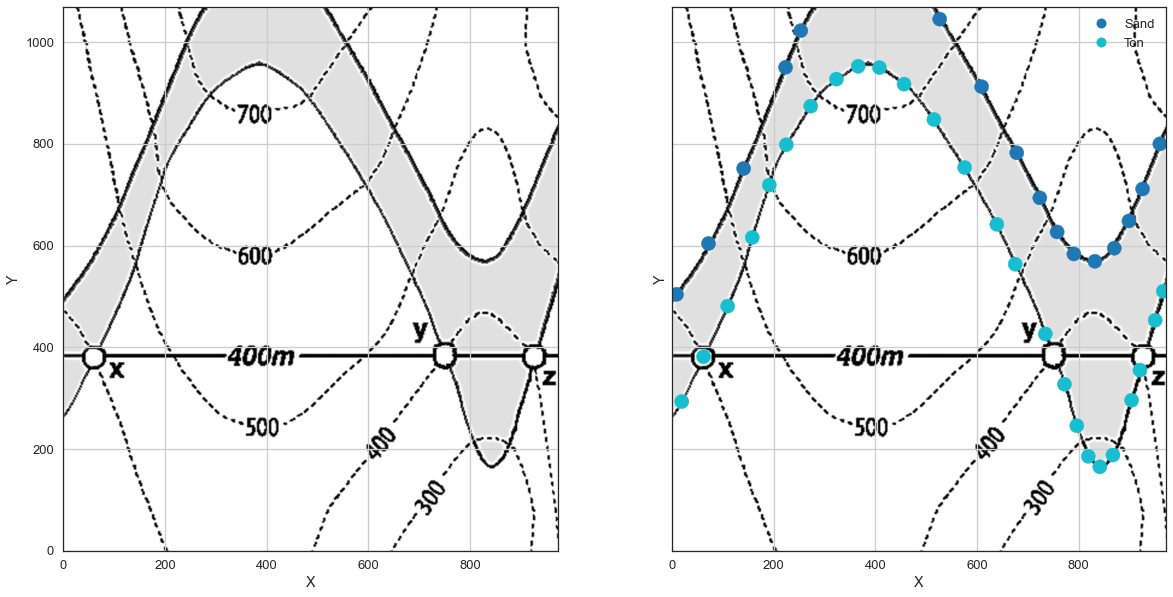

In [28]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_interfaces=True)

## Extracting X,Y coordinates from GeoDataFrame

The X and Y location of the set points are stored in the geometry column. ```gg.vector.extract_xy(...)``` extracts the X and Y coordinates of each point and returns a GeoDataFrame with the appended columns. By setting ```inplace=False``` (default value) a deep copy of the original GeoDataFrame is created and returned.

### Loading data

In [29]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

The loaded `interfaces` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [30]:
geo_data.raw_i = interfaces
geo_data.raw_i.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


### Extracting XY values

In [31]:
geo_data.raw_i = gg.vector.extract_xy(geo_data.raw_i, inplace=False)
geo_data.raw_i.head()

,id,formation,geometry,X,Y
0,None,Ton,POINT (19.150 293.313),19.15,293.31
1,None,Ton,POINT (61.934 381.459),61.93,381.46
2,None,Ton,POINT (109.358 480.946),109.36,480.95
3,None,Ton,POINT (157.812 615.999),157.81,616.00
4,None,Ton,POINT (191.318 719.094),191.32,719.09


The X and Y columns are now of dtype float64 for further processing.

In [32]:
geo_data.raw_i.dtypes

id             object
formation      object
geometry     geometry
X             float64
Y             float64
dtype: object

The original GeoDataFrame remains unchanged.

In [33]:
interfaces.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


## Extracting Z values from DEM

A digital elevation model (DEM) is usually needed for constructing geological models. A notebook specifically provided for rasters is provided with the repository. The function ```gg.vector.extract_z(...)``` can be used to extract height values directly from the DEM. 

### Loading DEM

The DEM is loaded as a rasterio object first. An introduction to rasterio objects and working with rasters in GemGIS is probvided in the next notebook.

In [34]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

The loaded `interfaces` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [35]:
geo_data.raw_i = interfaces
geo_data.raw_i.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [36]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

### Extracting Z values

If X and Y coordinates are not present within the interfaces GeoDataFrame, X, Y and Z values will be appended as columns to the GeoDataFrame.

In [37]:
geo_data.raw_i = gg.vector.extract_z(interfaces, dem, inplace=False)
geo_data.raw_i.head()

,id,formation,geometry,X,Y,Z
0,None,Ton,POINT (19.150 293.313),19.15,293.31,364.99
1,None,Ton,POINT (61.934 381.459),61.93,381.46,400.34
2,None,Ton,POINT (109.358 480.946),109.36,480.95,459.55
3,None,Ton,POINT (157.812 615.999),157.81,616.00,525.69
4,None,Ton,POINT (191.318 719.094),191.32,719.09,597.63


The original GeoDataFrame remains unchanged.

In [38]:
interfaces.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


## Extracting XY coordinates from GeoDataFrame and Z values from DEM

Both coordinates and heights can also be extracted directly the GeoDataFrame and the DEM with ```gg.extract_coordinates(...)```.

### Loading Data

In [39]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

The loaded `interfaces` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [40]:
geo_data.raw_i = interfaces
geo_data.raw_i.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [41]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

### Extracting XYZ values

In [42]:
geo_data.raw_i = gg.vector.extract_coordinates(interfaces, dem)
geo_data.raw_i.head()

,id,formation,geometry,X,Y,Z
0,None,Ton,POINT (19.150 293.313),19.15,293.31,364.99
1,None,Ton,POINT (61.934 381.459),61.93,381.46,400.34
2,None,Ton,POINT (109.358 480.946),109.36,480.95,459.55
3,None,Ton,POINT (157.812 615.999),157.81,616.00,525.69
4,None,Ton,POINT (191.318 719.094),191.32,719.09,597.63


The original GeoDataFrame remains unchanged.

In [43]:
interfaces.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


<a id='ex1.2'></a>
# Example 1.2 - Point Data - Orientations

As a second example we will have a look at the same geological map as before. A shape file ```orientations1.shp``` contains orientation values belonging to the gray layer. This data can now be loaded and plotted as shown below. Orientation values require a dip and an azimuth.  

For this example we will use the following functions:

- ```geo_data.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">

## Loading data

The orientation data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [44]:
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `orientations` are passed to the `geo_data.raw_o` attribute storing the raw orientation data. This attribute is also used for subsequent plotting!

In [45]:
geo_data.raw_o = orientations
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [46]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [47]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame is defining one object. In this case, each row defines one point with an X and Y coordinate. 

In [48]:
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


The dip and azimuth columns were provided as dtype float64. In case that the dip and azimuth values were not provided as this dtype but as string, the columns are converted by GemGIS automatically. 

In [49]:
geo_data.raw_o.dtypes

id             object
formation      object
dip           float64
azimuth       float64
geometry     geometry
dtype: object

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

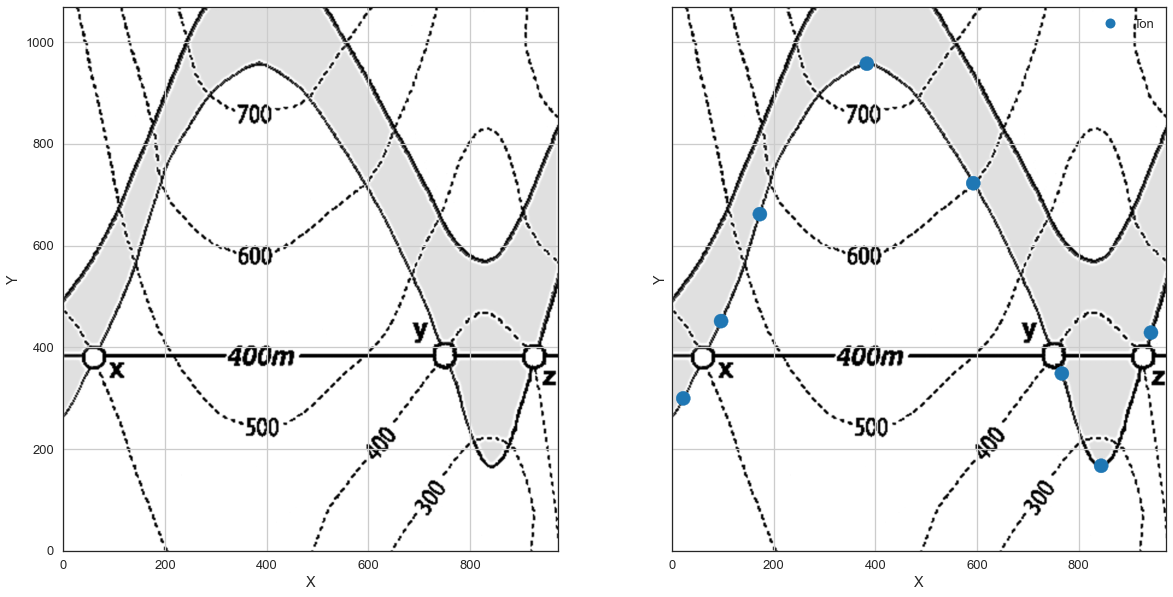

In [50]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_orientations=True)

## Extracting coordinates from GeoDataFrame

The same functions as introduced before can be used to create new GeoDataFrames with appended X, Y and Z columns

In [51]:
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

The loaded `orientations` are passed to the `geo_data.raw_o` attribute storing the raw orientation data. This attribute is also used for subsequent plotting!

In [52]:
geo_data.raw_o = orientations
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [53]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

## Extract XY Coordinates

In [54]:
geo_data.raw_o = gg.vector.extract_xy(geo_data.raw_o, inplace=False)
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry,X,Y
0,None,Ton,30.50,180.00,POINT (96.471 451.564),96.47,451.56
1,None,Ton,30.50,180.00,POINT (172.761 661.877),172.76,661.88
2,None,Ton,30.50,180.00,POINT (383.074 957.758),383.07,957.76
3,None,Ton,30.50,180.00,POINT (592.356 722.702),592.36,722.70
4,None,Ton,30.50,180.00,POINT (766.586 348.469),766.59,348.47


## Extract Height Data

In [55]:
geo_data.raw_o = gg.vector.extract_z(geo_data.raw_o, dem, inplace=False)
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry,X,Y,Z
0,None,Ton,30.50,180.00,POINT (96.471 451.564),96.47,451.56,440.59
1,None,Ton,30.50,180.00,POINT (172.761 661.877),172.76,661.88,556.38
2,None,Ton,30.50,180.00,POINT (383.074 957.758),383.07,957.76,729.02
3,None,Ton,30.50,180.00,POINT (592.356 722.702),592.36,722.70,601.55
4,None,Ton,30.50,180.00,POINT (766.586 348.469),766.59,348.47,378.63


## Extract Coordinates

In [56]:
geo_data.raw_o = gg.vector.extract_coordinates(geo_data.raw_o, dem, inplace=False)
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry,X,Y,Z
0,None,Ton,30.50,180.00,POINT (96.471 451.564),96.47,451.56,440.59
1,None,Ton,30.50,180.00,POINT (172.761 661.877),172.76,661.88,556.38
2,None,Ton,30.50,180.00,POINT (383.074 957.758),383.07,957.76,729.02
3,None,Ton,30.50,180.00,POINT (592.356 722.702),592.36,722.70,601.55
4,None,Ton,30.50,180.00,POINT (766.586 348.469),766.59,348.47,378.63


The original GeoDataFrame remains unchanged. 

In [57]:
orientations.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


<a id='ex2.1'></a>
# Example 2.1 - Line Data - Lithological Boundaries
As a third example we will have a look at the same geological map as before. A shape file ```interfaces1_lines.shp``` contains the digitized lithological boundaries in form of lines. The respective formation for the base of each layer is provided. This data can now be loaded and plotted as shown below. 
For this example we will use the following functions:

- ```geo_data.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">

## Loading data

The boundary data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [58]:
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [59]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

The loaded `boundaries` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [60]:
geo_data.raw_i = boundaries
geo_data.raw_i.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [61]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame is defining one object. In this case, each row defines one line which consists of multiple pairs of X and Y coordinates. 

In [62]:
geo_data.raw_i.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

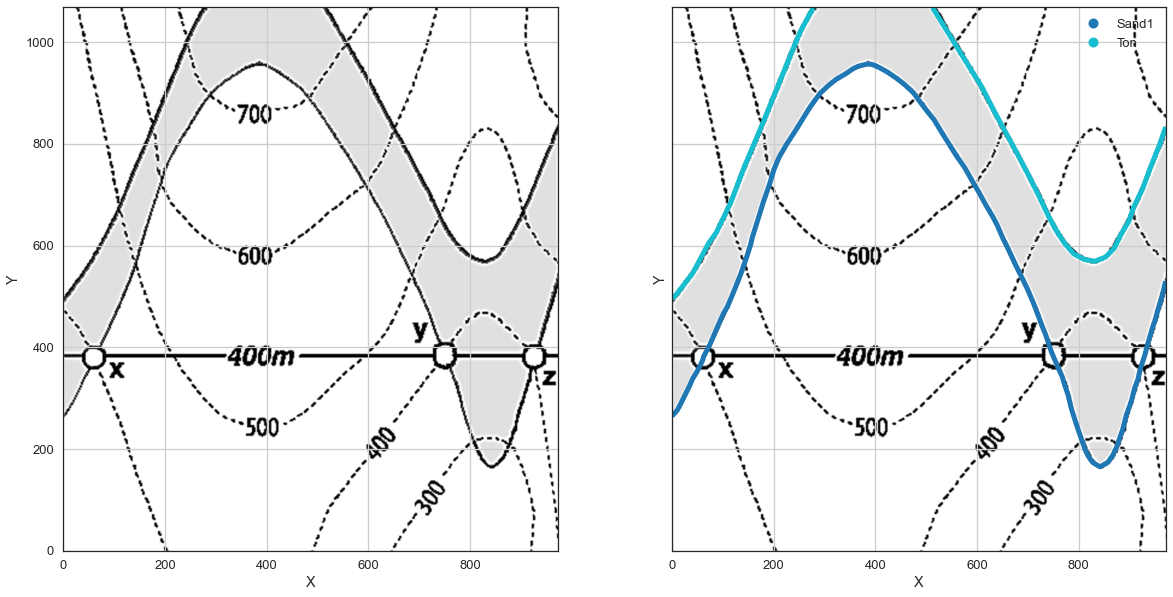

In [63]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_interfaces=True)

## Extracting coordinates from GeoDataFrame

The same functions as introduced before can be used to create new GeoDataFrames with appended X, Y and Z columns

In [64]:
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [65]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `boundaries` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [66]:
geo_data.raw_i = boundaries
geo_data.raw_i.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


## Extract XY Coordinates

In [67]:
geo_data.raw_i = gg.vector.extract_xy(geo_data.raw_i, inplace=False)
geo_data.raw_i.head()

,id,formation,geometry,points,X,Y
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(0.256327195431048, 264.86214748436396)",0.26,264.86
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(10.59346813871597, 276.73370778641777)",10.59,276.73
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(17.134940141888464, 289.089821570188)",17.13,289.09
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(19.150128045807676, 293.313485355882)",19.15,293.31
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(27.79511673965105, 310.571692592952)",27.80,310.57


## Extract Height Data

In [68]:
geo_data.raw_i = gg.vector.extract_z(geo_data.raw_i, dem, inplace=False)
geo_data.raw_i.head()

,id,formation,geometry,points,X,Y,Z
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(0.256327195431048, 264.86214748436396)",0.26,264.86,353.97
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(10.59346813871597, 276.73370778641777)",10.59,276.73,359.04
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(17.134940141888464, 289.089821570188)",17.13,289.09,364.28
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(19.150128045807676, 293.313485355882)",19.15,293.31,364.99
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(27.79511673965105, 310.571692592952)",27.80,310.57,372.81


In [69]:
geo_data.raw_i = gg.vector.extract_coordinates(geo_data.raw_i, dem, inplace=False)
geo_data.raw_i.head()

,id,formation,geometry,points,X,Y,Z
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(0.256327195431048, 264.86214748436396)",0.26,264.86,353.97
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(10.59346813871597, 276.73370778641777)",10.59,276.73,359.04
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(17.134940141888464, 289.089821570188)",17.13,289.09,364.28
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(19.150128045807676, 293.313485355882)",19.15,293.31,364.99
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(27.79511673965105, 310.571692592952)",27.80,310.57,372.81


<a id='ex2.2'></a>
# Example 2.2 - Line Data - Topographic Contours
As a fourth example we will have a look at the same geological map as before. A shape file ```topo.shp``` contains the digitized topographic contours in form of lines. The respective height for each line is provided. This data can now be loaded and plotted as shown below. 
For this example we will use the following functions:

- ```geo_data.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">

## Loading data

The height data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [70]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [71]:
geo_data.raw_dem = topo
geo_data.raw_dem

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."
5,None,600,"LINESTRING (114.513 1068.069, 151.627 930.438,..."
6,None,500,"LINESTRING (28.429 1067.554, 71.728 866.004, 1..."


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [72]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [73]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame is defining one object. In this case, each row defines one line which consists of multiple pairs of X and Y coordinates. 

In [74]:
geo_data.raw_dem.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

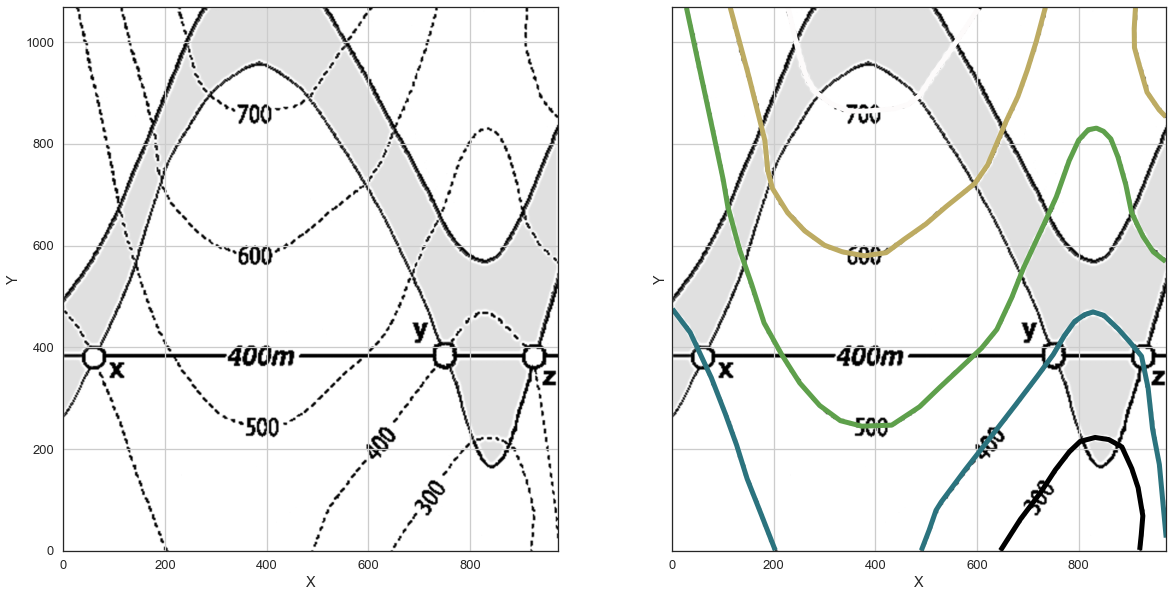

In [75]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap=True, 
                           show_topo=True
                           )

## Extracting coordinates from GeoDataFrame

The same functions as introduced before can be used to create new GeoDataFrames with appended X, Y and Z columns

In [76]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [77]:
geo_data.raw_dem = topo
geo_data.raw_dem

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."
5,None,600,"LINESTRING (114.513 1068.069, 151.627 930.438,..."
6,None,500,"LINESTRING (28.429 1067.554, 71.728 866.004, 1..."


In [78]:
geo_data.raw_dem.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


## Extract XY Coordinates

In [79]:
geo_data.raw_dem = gg.vector.extract_xy(geo_data.raw_dem, inplace=False)
geo_data.raw_dem.head()

,id,Z,geometry,points,X,Y
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(0.7408806771479846, 475.44101474698454)",0.74,475.44
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(35.62873136073459, 429.2469161566801)",35.63,429.25
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(77.30033078835194, 340.0890755208477)",77.30,340.09
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(104.75836141895252, 269.34426719024157)",104.76,269.34
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(127.04782157791061, 207.64445718500974)",127.05,207.64


## Extract XYZ Coordinates

If Z values are already present a GeoDataFrame column, a DEM is not needed to extract the remaining coordinates.

In [80]:
geo_data.raw_dem = gg.vector.extract_coordinates(geo_data.raw_dem, inplace=False)
geo_data.raw_dem.head()

,id,Z,geometry,points,X,Y
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(0.7408806771479846, 475.44101474698454)",0.74,475.44
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(35.62873136073459, 429.2469161566801)",35.63,429.25
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(77.30033078835194, 340.0890755208477)",77.30,340.09
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(104.75836141895252, 269.34426719024157)",104.76,269.34
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(127.04782157791061, 207.64445718500974)",127.05,207.64


 <a id='ex3.1'></a>
# Example 3.1 -  Clip Vector Data by Extent - Points
Vector data downloaded from the Internet or created manually based on field data or information obtained from literature may be present in areas beyond the extent of the desired model. For this case, unwanted data can be clipped by defining an extent or bounding box (bbox). Only data points within this bounding box are kept. The function `gg.vector.clip_by_extent(...)` can be used to to clip vector data to a provided extent. For this example, the file `randompoints1.shp` is loaded.

## Loading Data
In order to demonstrate this function, random points were picked inside and outside the geological map. They will then be clipped by the extent of the geological map and the remaining points are shown. 

In [81]:
random_points = gpd.read_file('../../gemgis/data/Test1/randompoints1.shp')
random_points['formation'] = 'Test'
geolmap = rasterio.open('../data/Test1/task1.tif')

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [82]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

The loaded `random_points` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [83]:
geo_data.raw_i = random_points
geo_data.raw_i.head()

,id,geometry,formation
0,None,POINT (281.526 902.087),Test
1,None,POINT (925.867 618.577),Test
2,None,POINT (718.131 342.799),Test
3,None,POINT (331.011 255.684),Test
4,None,POINT (300.083 600.535),Test


## Setting the extent
The extent will be set by the dimensions of the image.

In [84]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the Data

In [85]:
geo_data.raw_i.head()

,id,geometry,formation
0,None,POINT (281.526 902.087),Test
1,None,POINT (925.867 618.577),Test
2,None,POINT (718.131 342.799),Test
3,None,POINT (331.011 255.684),Test
4,None,POINT (300.083 600.535),Test


In [86]:
len(geo_data.raw_i)

50

## Clipping the Data
By clipping the data, half of the points will be removed. In addition, X and Y coordinates are appended to the column.

In [87]:
geo_data.raw_i = gg.vector.clip_by_extent(geo_data.raw_i, geo_data.extent, inplace=False)
print(len(geo_data.raw_i))
geo_data.raw_i.head()

25


,id,formation,X,Y,geometry
0,None,Test,281.53,902.09,POINT (281.526 902.087)
1,None,Test,925.87,618.58,POINT (925.867 618.577)
2,None,Test,718.13,342.80,POINT (718.131 342.799)
3,None,Test,331.01,255.68,POINT (331.011 255.684)
4,None,Test,300.08,600.54,POINT (300.083 600.535)


The original gdf (GeoDataFrame) remains unchanged.

In [88]:
print(random_points.head())
print(len(random_points))

     id                 geometry formation
0  None  POINT (281.526 902.087)      Test
1  None  POINT (925.867 618.577)      Test
2  None  POINT (718.131 342.799)      Test
3  None  POINT (331.011 255.684)      Test
4  None  POINT (300.083 600.535)      Test
50


## Plotting the result

<AxesSubplot:xlabel='X', ylabel='Y'>

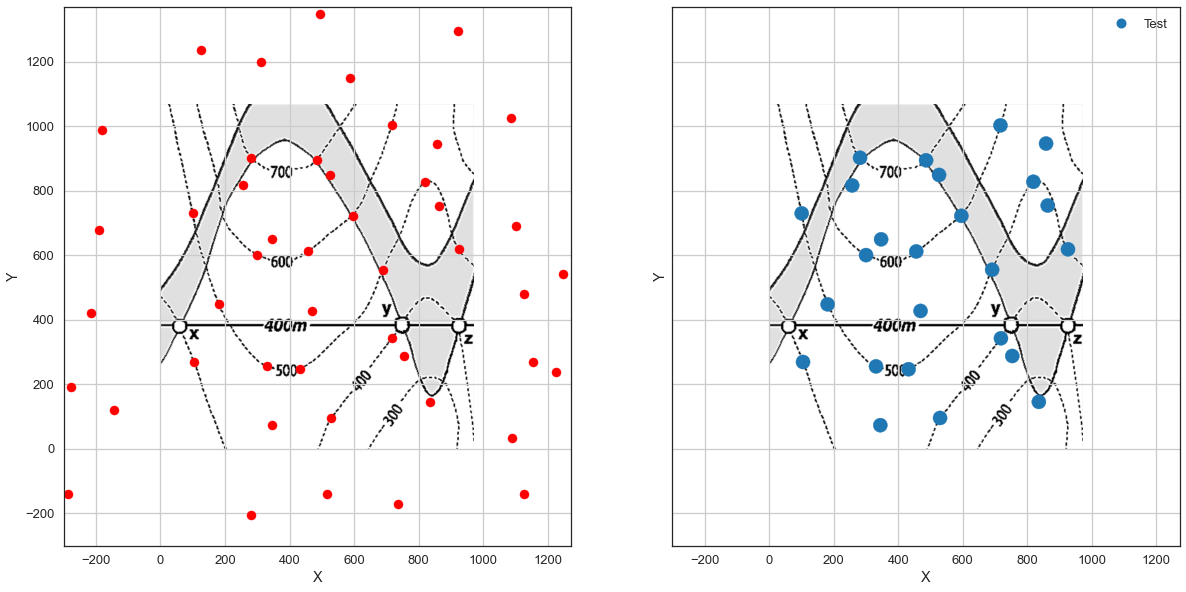

In [89]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_geolmap=True, 
                           show_interfaces=True,
                           add_to_extent=300 
                           )


random_points.plot(ax=ax1, color='red');


<a id='ex3.2'></a>
# Example 3.2 - Clip Vector Data by Shape - Lines
In the same way as before, lines can be clipped to a desired extent. As a line consists of at least two vertices, the vertices beyond the extent will be removed. 

In [90]:
geological_map = rasterio.open('../data/Test1/task1.tif')
random_lines = gpd.read_file('../../gemgis/data/Test1/randomlines1.shp')
random_lines['formation'] = 'Test'
random_lines.head()

,id,geometry,formation
0,None,"LINESTRING (114.913 978.626, 860.498 160.727, ...",Test
1,None,"LINESTRING (214.657 108.361, 743.299 868.907)",Test
2,None,"LINESTRING (107.433 522.298, 892.915 542.247)",Test
3,None,"LINESTRING (813.120 1003.562, 212.163 641.990)",Test
4,None,"LINESTRING (-299.023 1247.934, 192.215 587.131...",Test


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [91]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

The loaded `random_lines` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [92]:
geo_data.raw_i = random_lines
geo_data.raw_i.head()

,id,geometry,formation
0,None,"LINESTRING (114.913 978.626, 860.498 160.727, ...",Test
1,None,"LINESTRING (214.657 108.361, 743.299 868.907)",Test
2,None,"LINESTRING (107.433 522.298, 892.915 542.247)",Test
3,None,"LINESTRING (813.120 1003.562, 212.163 641.990)",Test
4,None,"LINESTRING (-299.023 1247.934, 192.215 587.131...",Test


## Setting the Extent

In [93]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Inspecting the Data

In [94]:
geo_data.raw_i.head()

,id,geometry,formation
0,None,"LINESTRING (114.913 978.626, 860.498 160.727, ...",Test
1,None,"LINESTRING (214.657 108.361, 743.299 868.907)",Test
2,None,"LINESTRING (107.433 522.298, 892.915 542.247)",Test
3,None,"LINESTRING (813.120 1003.562, 212.163 641.990)",Test
4,None,"LINESTRING (-299.023 1247.934, 192.215 587.131...",Test


In [95]:
len(geo_data.raw_i)

7

## Clipping the Lines

In [96]:
geo_data.raw_i = gg.vector.clip_by_extent(geo_data.raw_i, geo_data.extent, inplace=False)
print(len(geo_data.raw_i))
geo_data.raw_i.head()

11


,id,formation,points,X,Y,geometry
0,None,Test,"(114.91329461659507, 978.6256160638271)",114.91,978.63,POINT (114.913 978.626)
0,None,Test,"(860.498073884288, 160.7265939909064)",860.50,160.73,POINT (860.498 160.727)
1,None,Test,"(214.65707779621948, 108.36110782160335)",214.66,108.36,POINT (214.657 108.361)
1,None,Test,"(743.2991286482293, 868.9074545662402)",743.30,868.91,POINT (743.299 868.907)
2,None,Test,"(107.43251087812314, 522.2978080170451)",107.43,522.30,POINT (107.433 522.298)


## Plotting the Result
The left image shows the data (lines and vertices) before the clipping, the right image shows the original lines and the vertices that remain after clipping. 

<AxesSubplot:xlabel='X', ylabel='Y'>

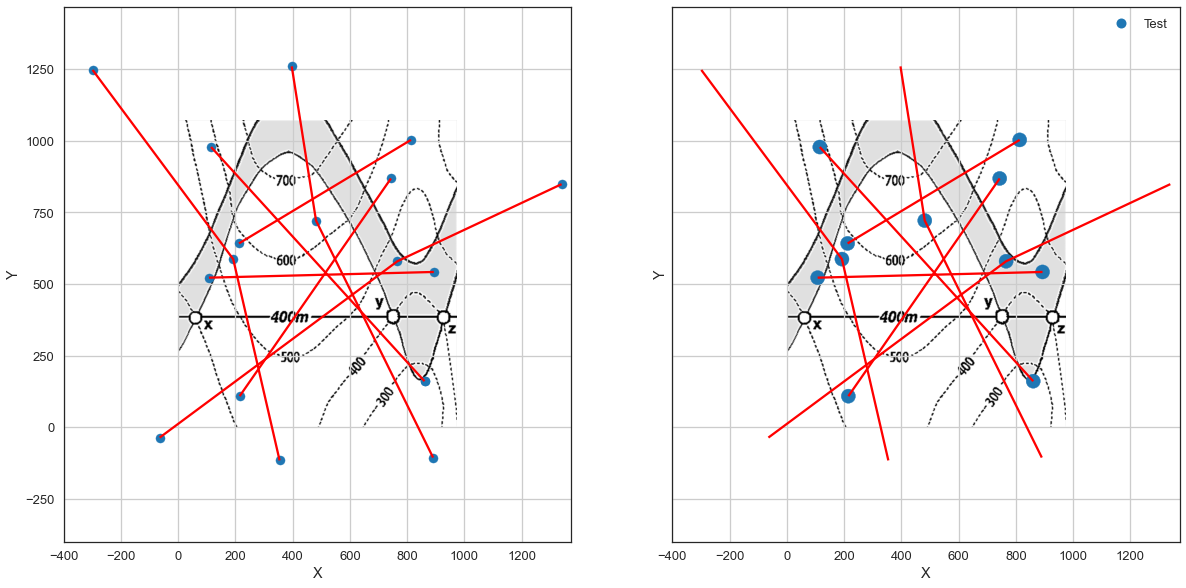

In [97]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_geolmap=True, 
                           show_interfaces=True,
                           add_to_extent=400 
                           )

random_lines.plot(ax=ax2, color='red')

random_lines_points = gg.vector.extract_xy(random_lines)
ax1.scatter(random_lines_points.X, random_lines_points.Y)
random_lines.plot(ax=ax1, color='red')

<a id='ex3.3'></a>
# Example 3.3 - Clip Vector Data by Shape - Points

Besides clipping Vector data by providing an extent, it can also be clipped using a shape (file). Once again, the size of the shape is equal to the boundaries of the geological map.

## Loading data

In [98]:
random_points = gpd.read_file('../../gemgis/data/Test1/randompoints1.shp')
random_points['formation'] = 'Test'
geolmap = rasterio.open('../data/Test1/task1.tif')
extent = gpd.read_file('../../gemgis/data/Test1/extent1.shp')

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [99]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

The loaded `random_points` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [100]:
geo_data.raw_i = random_points
geo_data.raw_i.head()

,id,geometry,formation
0,None,POINT (281.526 902.087),Test
1,None,POINT (925.867 618.577),Test
2,None,POINT (718.131 342.799),Test
3,None,POINT (331.011 255.684),Test
4,None,POINT (300.083 600.535),Test


In [101]:
geo_data.extent = extent
geo_data.extent

,id,geometry
0,None,"POLYGON ((-0.000 1069.000, 972.000 1069.000, 9..."


## Inspecting the Data

In [102]:
geo_data.raw_i.head()

,id,geometry,formation
0,None,POINT (281.526 902.087),Test
1,None,POINT (925.867 618.577),Test
2,None,POINT (718.131 342.799),Test
3,None,POINT (331.011 255.684),Test
4,None,POINT (300.083 600.535),Test


In [103]:
len(geo_data.raw_i)

50

## Clipping the Data

In [104]:
geo_data.raw_i = gg.vector.clip_by_shape(geo_data.raw_i, geo_data.extent)
geo_data.raw_i.head()

,id,formation,X,Y,geometry
0,None,Test,281.53,902.09,POINT (281.526 902.087)
1,None,Test,925.87,618.58,POINT (925.867 618.577)
2,None,Test,718.13,342.80,POINT (718.131 342.799)
3,None,Test,331.01,255.68,POINT (331.011 255.684)
4,None,Test,300.08,600.54,POINT (300.083 600.535)


## Plotting the Result

<AxesSubplot:xlabel='X', ylabel='Y'>

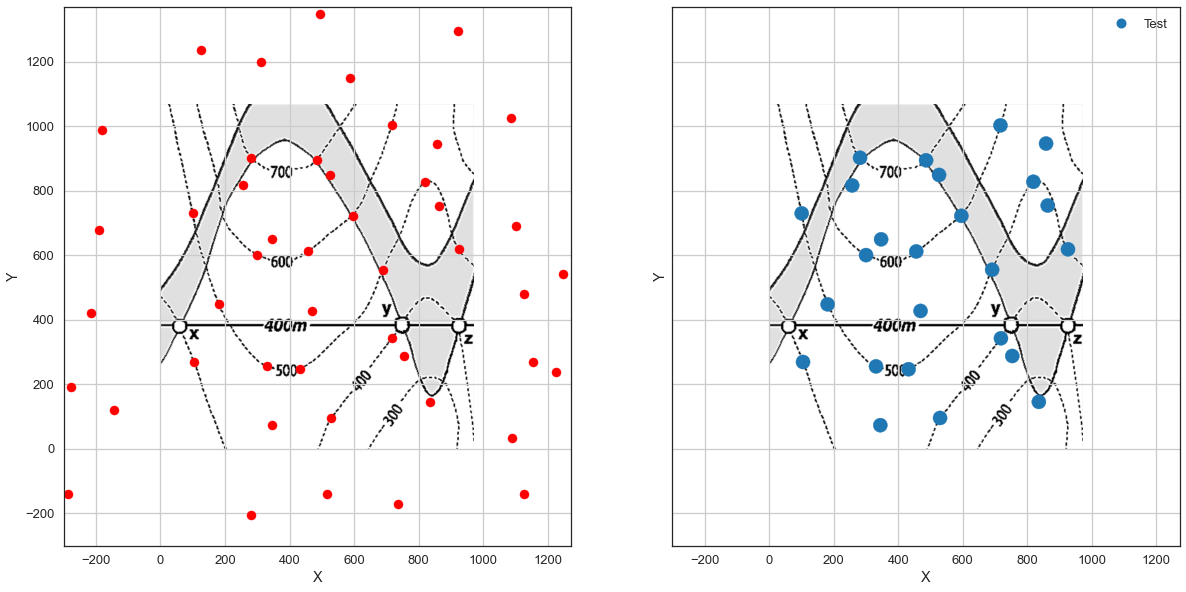

In [105]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_geolmap=True, 
                           show_interfaces=True,
                           add_to_extent=300 
                           )


random_points.plot(ax=ax1, color='red');


<a id='ex3.4'></a>
# Example 3.4 - Clipping Vector Data by Shape - Lines
In the same way as before, lines can be clipped by a provided shape. As a line consists of at least two vertices, the vertices beyond the extent will be removed. 

## Loading Data

In [106]:
random_lines = gpd.read_file('../../gemgis/data/Test1/randomlines1.shp')
random_lines['formation'] = 'Test'
geolmap = rasterio.open('../data/Test1/task1.tif')
extent = gpd.read_file('../../gemgis/data/Test1/extent1.shp')

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [107]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

The loaded `random_lines` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [108]:
geo_data.raw_i = random_lines
geo_data.raw_i.head()

,id,geometry,formation
0,None,"LINESTRING (114.913 978.626, 860.498 160.727, ...",Test
1,None,"LINESTRING (214.657 108.361, 743.299 868.907)",Test
2,None,"LINESTRING (107.433 522.298, 892.915 542.247)",Test
3,None,"LINESTRING (813.120 1003.562, 212.163 641.990)",Test
4,None,"LINESTRING (-299.023 1247.934, 192.215 587.131...",Test


In [109]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

In [110]:
geo_data.extent = extent
geo_data.extent

,id,geometry
0,None,"POLYGON ((-0.000 1069.000, 972.000 1069.000, 9..."


## Inspecting the Data

In [111]:
geo_data.raw_i.head()

,id,geometry,formation
0,None,"LINESTRING (114.913 978.626, 860.498 160.727, ...",Test
1,None,"LINESTRING (214.657 108.361, 743.299 868.907)",Test
2,None,"LINESTRING (107.433 522.298, 892.915 542.247)",Test
3,None,"LINESTRING (813.120 1003.562, 212.163 641.990)",Test
4,None,"LINESTRING (-299.023 1247.934, 192.215 587.131...",Test


In [112]:
len(geo_data.raw_i)

7

## Clipping the Data

In [113]:
geo_data.raw_i = gg.vector.clip_by_shape(geo_data.raw_i, geo_data.extent)
geo_data.raw_i.head()

,id,formation,points,X,Y,geometry
0,None,Test,"(114.91329461659507, 978.6256160638271)",114.91,978.63,POINT (114.913 978.626)
0,None,Test,"(860.498073884288, 160.7265939909064)",860.50,160.73,POINT (860.498 160.727)
1,None,Test,"(214.65707779621948, 108.36110782160335)",214.66,108.36,POINT (214.657 108.361)
1,None,Test,"(743.2991286482293, 868.9074545662402)",743.30,868.91,POINT (743.299 868.907)
2,None,Test,"(107.43251087812314, 522.2978080170451)",107.43,522.30,POINT (107.433 522.298)


## Plotting the Result

<AxesSubplot:xlabel='X', ylabel='Y'>

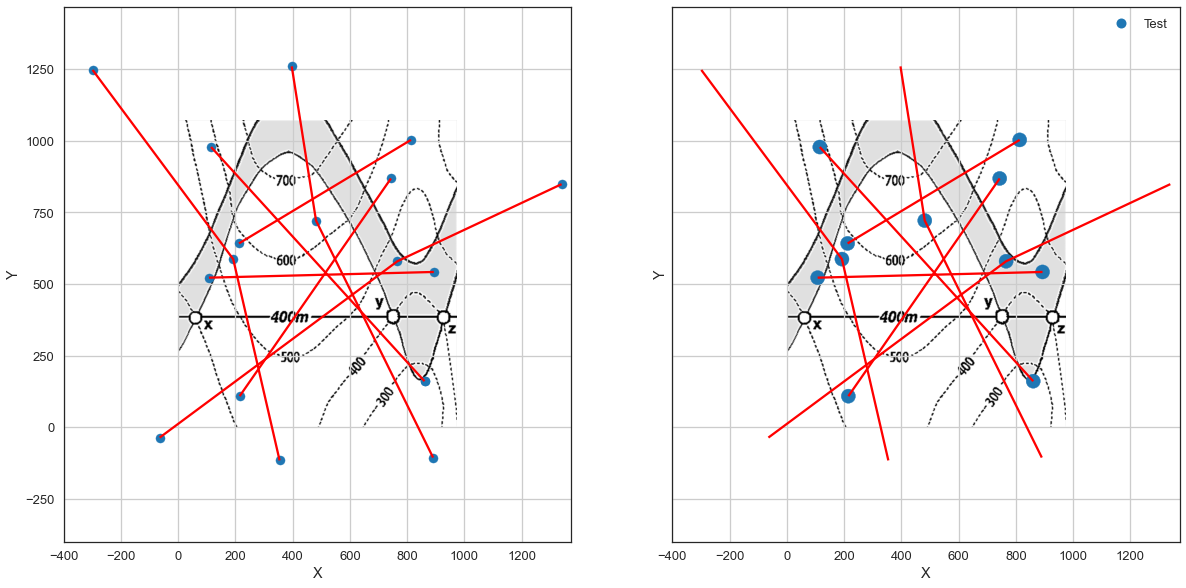

In [114]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_geolmap=True, 
                           show_interfaces=True,
                           add_to_extent=400 
                           )

random_lines.plot(ax=ax2, color='red')

random_lines_points = gg.vector.extract_xy(random_lines)
ax1.scatter(random_lines_points.X, random_lines_points.Y)
random_lines.plot(ax=ax1, color='red');

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [115]:
import sys  
sys.path.append('../../gempy-master')
import gempy as gp
from matplotlib.colors import ListedColormap
print(gp)
print(gp.__version__)

<module 'gempy' from '../../gempy-master\\gempy\\__init__.py'>
2.2.4


## Loading interfaces and orientations for model

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy` described here: https://github.com/cgre-aachen/gempy/issues/492

In [116]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

In [117]:
geo_data.raw_i = interfaces
geo_data.raw_i.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


In [118]:
geo_data.raw_o = orientations
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


## Prepare Data for GemPy

In [119]:
geo_data.raw_i = gg.vector.extract_coordinates(geo_data.raw_i,dem,inplace=True)
geo_data.raw_i.head()

,id,formation,geometry,X,Y,Z
0,None,Ton,POINT (19.150 293.313),19.15,293.31,364.99
1,None,Ton,POINT (61.934 381.459),61.93,381.46,400.34
2,None,Ton,POINT (109.358 480.946),109.36,480.95,459.55
3,None,Ton,POINT (157.812 615.999),157.81,616.00,525.69
4,None,Ton,POINT (191.318 719.094),191.32,719.09,597.63


## Extract Coordinates

In [120]:
geo_data.raw_o = gg.vector.extract_coordinates(geo_data.raw_o,dem,inplace=True)
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry,X,Y,Z
0,None,Ton,30.50,180.00,POINT (96.471 451.564),96.47,451.56,440.59
1,None,Ton,30.50,180.00,POINT (172.761 661.877),172.76,661.88,556.38
2,None,Ton,30.50,180.00,POINT (383.074 957.758),383.07,957.76,729.02
3,None,Ton,30.50,180.00,POINT (592.356 722.702),592.36,722.70,601.55
4,None,Ton,30.50,180.00,POINT (766.586 348.469),766.59,348.47,378.63


## Convert GeoDataFrames to GemPy DataFrames

Converting GeoDataFrames into Pandas DataFrames is easily done with ```gg.convert_to_gempy_df(gdf)```. If the GeoDataFrame contains orientation measurements, an orientation DataFrame will be returned. If `polarity` was not provided, an additional column will be added to the DataFrame. In order to create a `GemPy` DataFrame, the coordinates and the formation of each point are needed.

In [121]:
geo_data.raw_i=gg.utils.convert_to_gempy_df(geo_data.raw_i)
geo_data.raw_i.head()

,X,Y,Z,formation
0,19.15,293.31,364.99,Ton
1,61.93,381.46,400.34,Ton
2,109.36,480.95,459.55,Ton
3,157.81,616.00,525.69,Ton
4,191.32,719.09,597.63,Ton


In [122]:
geo_data.raw_o=gg.utils.convert_to_gempy_df(geo_data.raw_o)
geo_data.raw_o.head()

,X,Y,Z,formation,dip,azimuth,polarity
0,96.47,451.56,440.59,Ton,30.50,180.00,1
1,172.76,661.88,556.38,Ton,30.50,180.00,1
2,383.07,957.76,729.02,Ton,30.50,180.00,1
3,592.36,722.70,601.55,Ton,30.50,180.00,1
4,766.59,348.47,378.63,Ton,30.50,180.00,1


## Assign interfaces and orientations to GemPy Data Class

The created orientation and interfaces DataFrames can now be attributed to the GemPy Data Class

In [123]:
geo_data.interfaces = geo_data.raw_i
geo_data.interfaces.head()

,X,Y,Z,formation
0,19.15,293.31,364.99,Ton
1,61.93,381.46,400.34,Ton
2,109.36,480.95,459.55,Ton
3,157.81,616.00,525.69,Ton
4,191.32,719.09,597.63,Ton


In [124]:
geo_data.orientations = geo_data.raw_o
geo_data.orientations.head()

,X,Y,Z,formation,dip,azimuth,polarity
0,96.47,451.56,440.59,Ton,30.50,180.00,1
1,172.76,661.88,556.38,Ton,30.50,180.00,1
2,383.07,957.76,729.02,Ton,30.50,180.00,1
3,592.36,722.70,601.55,Ton,30.50,180.00,1
4,766.59,348.47,378.63,Ton,30.50,180.00,1


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [125]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2020-08-29 21:04

In [126]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

In [127]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model1  2020-08-29 21:04

In [128]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Ton,Default series,1,#015482,1
1,Sand,Default series,2,#9f0052,2


In [129]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')
geo_model.surfaces.colors.change_colors(geo_data.surface_colors) 

In [130]:
geo_model.set_topography(source='gdal', filepath=geo_data.dem)


Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [131]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1528.90
$C_o$           55655.83
drift equations      [3]


In [132]:
sol = gp.compute_model(geo_model)

../../gempy-master\gempy\core\solution.py:317: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
../../gempy-master\gempy\core\solution.py:317: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))


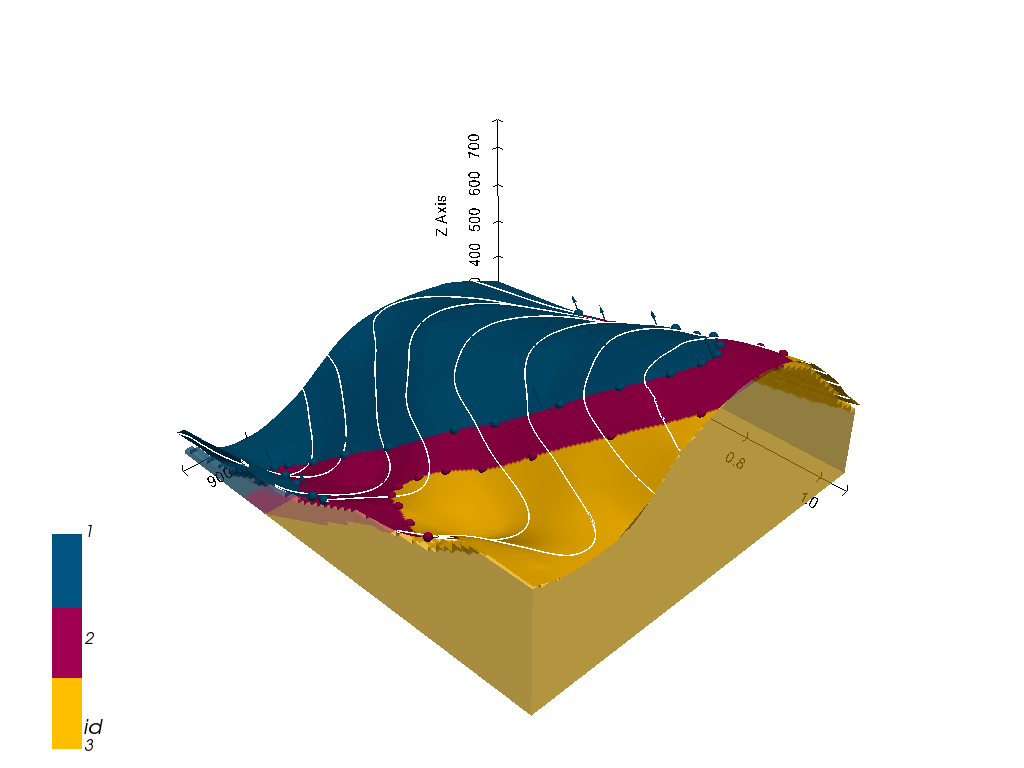

In [133]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)

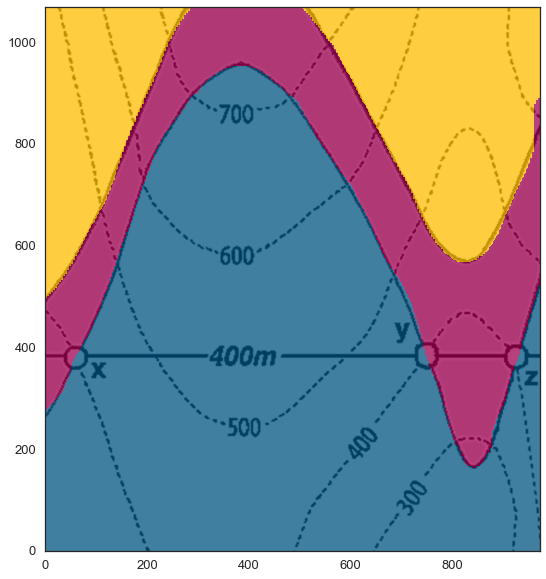

In [134]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = geo_data.surface_colors.values()
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

<a id='post'></a>
# Postprocessing - Converting Geological Map to Shape Files and GeoTiffs

## Create GeoDataFrame with Polygons

In [135]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

,formation,geometry
0,basement,"POLYGON ((4.880 499.515, 5.832 500.460, 8.686 ..."
1,basement,"POLYGON ((814.536 568.308, 818.424 567.517, 82..."
2,Sand,"POLYGON ((841.752 164.826, 845.640 165.065, 84..."
3,Ton,"POLYGON ((5.832 1.944, 9.720 1.944, 13.608 1.9..."


## Plot Polygons

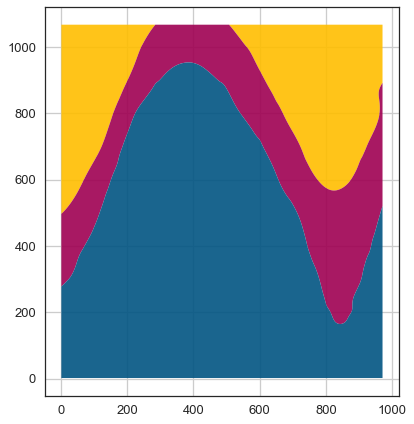

In [136]:
cols = geo_model.surfaces.df.color.to_list()
cols = [cols[1], cols[0], cols[2]]
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [137]:
gdf.to_file('../../gemgis/data/Test1/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [138]:
gg.raster.save_as_tiff('../../gemgis/data/Test1/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Reporting your Python environment's package versions and hardware resources

In [139]:
import scooby

In [140]:
scooby.Report(additional=[gpd, rasterio, gg])

--------------------------------------------------------------------------------
  Date: Sat Aug 29 21:05:25 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 8
           Machine : AMD64
      Architecture : 64bit
               RAM : 7.9 GB
       Environment : Jupyter

  Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

         geopandas : 0.6.1
          rasterio : 1.1.0
            gemgis : 0.1.0
             numpy : 1.19.1
             scipy : 1.5.2
           IPython : 7.17.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------